In [62]:
from imports import *
from tools import *

In [63]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wclusters_wprops.fits' %root_dir)
print('Number of regions: %i' %len(table))

# Sort mask
for colname in table.colnames:
    try: 
        table[colname].fill_value = np.nan
    except:
        continue

# Get HII region mask
mask = table['HII_class_v3_MUSE'] == 1
table = table[mask]
print('Number of HII regions: %i' %len(table))

# Get age mask
age = table['reg_dolflux_Age_MinChiSq'].value
age_ = table['reg_dolflux_Age_MinChiSq_massweighted'].value
age[~age_.mask] = age_[~age_.mask]
mask = age <= 5
table = table[mask]
print('Number of regions <5 Myr: %i' %len(table))

radius_circ_pc  = np.log10(table['radius_circ_pc'].value)
radius_mom_pc   = np.log10(table['mean_sigma_pc'].value)
radius_strom_pc = np.log10(table['radius_strom_pc'].value)

raduis_eff = table['r_reff_MUSE'].value

Pdir_circ  = np.log10(table['Pdir_circ'].value)
Pdir_mom   = np.log10(table['Pdir_mom'].value)
Pdir_strom = np.log10(table['Pdir_strom'].value) 
Ptherm     = np.log10(table['Ptherm'].value)

Pdir_circ_Lbol_KE12  = np.log10(table['Pdir_circ_Lbol_KE12'].value)
Pdir_circ_Lbol_B21  = np.log10(table['Pdir_circ_Lbol_B21'].value)

mass = np.log10(table['reg_dolflux_Mass_MinChiSq'].value)
age = table['reg_dolflux_Age_MinChiSq'].value

mass_ = np.log10(table['reg_dolflux_Mass_MinChiSq_sum'].value)
age_ = table['reg_dolflux_Age_MinChiSq_massweighted'].value
mass[~mass_.mask] = mass_[~mass_.mask]
age[~age_.mask] = age_[~age_.mask]

sii = table['SII6716_FLUX_CORR_MUSE'].value
siii = table['SIII9068_FLUX_CORR_MUSE'].value
sii_err = table['SII6716_FLUX_CORR_ERR_MUSE'].value
siii_err = table['SIII9068_FLUX_CORR_ERR_MUSE'].value

lbol = table['Lbol'].value

s_mask = (sii > 0) & (siii > 0) & (siii/sii > 0) & (sii/sii_err>3) & (siii/siii_err>3)
ratio_siii_sii = np.log10(siii/sii)

ebv = table['EBV_MUSE'].value
table['met_scal_MUSE'].fill_value = np.nan
met = np.array(table['met_scal_MUSE'].value)

Number of regions: 5466
Number of HII regions: 5151
Number of regions <5 Myr: 2518


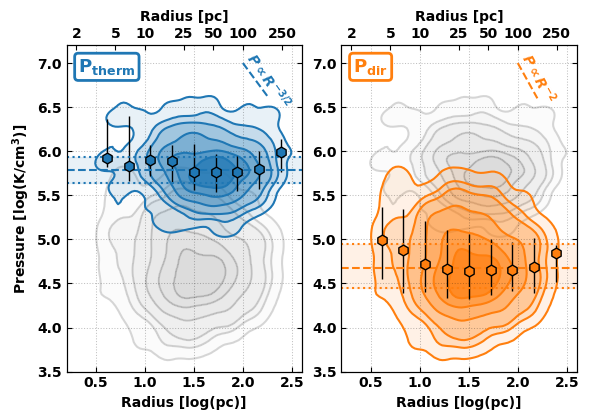

In [64]:
data_x1 = radius_circ_pc
data_y1 = Ptherm
data_x2 = radius_circ_pc
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4.3)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0.5, 2.5, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

# Add relations
x = np.array([2, 2.25])
ax1.plot(x, 10+(x*(-3/2)), color='C0', lw=1.5, ls='--')
x = np.array([2, 2.2])
ax2.plot(x, 11+(x*(-2)), color='C1', lw=1.5, ls='--')
ax1.text(2, 7.15, '$P \propto R^{-3/2}$', size=10, va='top', ha='left', color='C0', rotation=-55)
ax2.text(2, 7.15, '$P \propto R^{-2}$', size=10, va='top', ha='left', color='C1', rotation=-62)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Radius [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius [pc]')
    ax3.grid(False)
    
ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_contour.pdf', dpi=200, bbox_inches='tight')

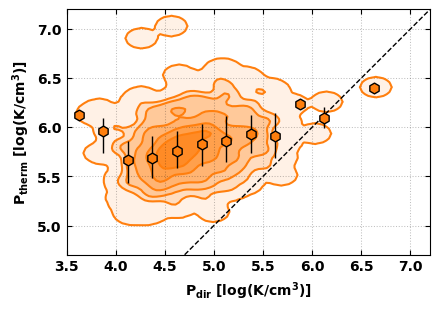

In [65]:
data_x = Pdir_circ
data_y = Ptherm

fig = plt.figure(figsize=(4.5, 4.5)) 
ax = fig.add_subplot(111, aspect='equal')

ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(2, 2), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.999), alphas=np.ones(6))
ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(2, 2), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.999), alphas=np.linspace(0.9, 0.1, 6))

x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(3.5, 7, 15))
ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

ax.plot([0, 10], [0, 10], color='black', lw=1, ls='--')

ax.set_xlim(3.5, 7.2)
ax.set_ylim(4.7, 7.2)

ax.set_xlabel('P$_\mathrm{dir}$ [log(K/cm$^3$)]')
ax.set_ylabel('P$_\mathrm{therm}$ [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_pp_contour.pdf', dpi=200, bbox_inches='tight')

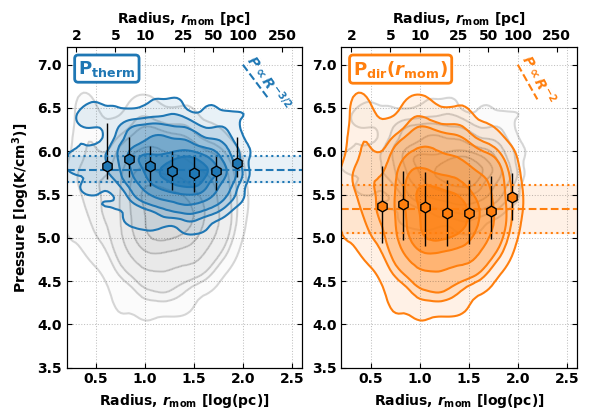

In [66]:
data_x1 = radius_mom_pc
data_y1 = Ptherm
data_x2 = radius_mom_pc
data_y2 = Pdir_mom

fig = plt.figure(figsize=(6, 4.3)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0.5, 2.5, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

# Add relations
x = np.array([2, 2.25])
ax1.plot(x, 10+(x*(-3/2)), color='C0', lw=1.5, ls='--')
x = np.array([2, 2.2])
ax2.plot(x, 11+(x*(-2)), color='C1', lw=1.5, ls='--')
ax1.text(2, 7.15, '$P \propto R^{-3/2}$', size=10, va='top', ha='left', color='C0', rotation=-55)
ax2.text(2, 7.15, '$P \propto R^{-2}$', size=10, va='top', ha='left', color='C1', rotation=-62)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Radius, $r_\mathrm{mom}$ [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius, $r_\mathrm{mom}$ [pc]')
    ax3.grid(False)
    
ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir} (r_\mathrm{mom}$)', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_rmom_contour.pdf', dpi=200, bbox_inches='tight')

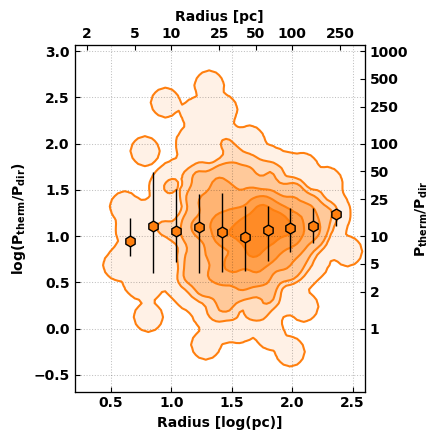

In [84]:
data_x = radius_circ_pc
data_y = Ptherm-Pdir_circ

fig = plt.figure(figsize=(4.5, 4.5)) 
ax = fig.add_subplot(111)

ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(2, 2), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.999), alphas=np.ones(6))
ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(2, 2), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.999), alphas=np.linspace(0.9, 0.1, 6))

x, y, stats, bins = get_bins_1d(data_x, data_y)
ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

ax.set_xlim(0.2, 2.6)
# ax.set_ylim(3.5, 7.2)

ax.set_xlabel('Radius [log(pc)]')

ax3 = ax.twiny()
ax3.set_xlim(ax.get_xlim())
new_tick_locations = np.log10([2,5,10,25,50,100,250])
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
ax3.set_xlabel('Radius [pc]')
ax3.grid(False)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
new_tick_locations = np.log10([1,2.5,5,10,25,50,100,250,500,1000])
ax3.set_yticks(new_tick_locations)
ax3.set_yticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
ax3.set_ylabel('P$_\mathrm{therm}$/P$_\mathrm{dir}$')
ax3.grid(False)

ax.set_ylabel('log(P$_\mathrm{therm}$/P$_\mathrm{dir}$)')

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_ratio_contour.pdf', dpi=200, bbox_inches='tight')

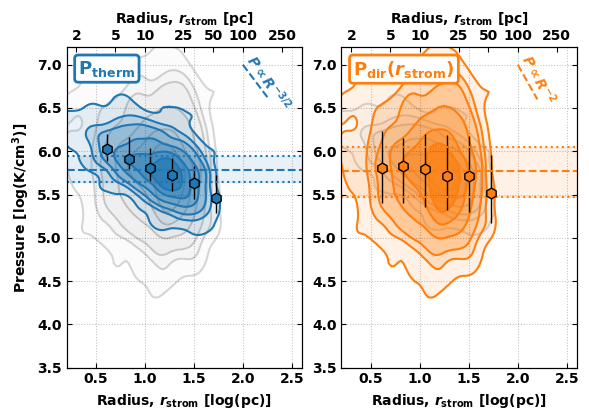

In [68]:
data_x1 = radius_strom_pc
data_y1 = Ptherm
data_x2 = radius_strom_pc
data_y2 = Pdir_strom

fig = plt.figure(figsize=(6, 4.3)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0.5, 2.5, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

# Add relations
x = np.array([2, 2.25])
ax1.plot(x, 10+(x*(-3/2)), color='C0', lw=1.5, ls='--')
x = np.array([2, 2.2])
ax2.plot(x, 11+(x*(-2)), color='C1', lw=1.5, ls='--')
ax1.text(2, 7.15, '$P \propto R^{-3/2}$', size=10, va='top', ha='left', color='C0', rotation=-55)
ax2.text(2, 7.15, '$P \propto R^{-2}$', size=10, va='top', ha='left', color='C1', rotation=-62)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Radius, $r_\mathrm{strom}$ [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius, $r_\mathrm{strom}$ [pc]')
    ax3.grid(False)

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir} (r_\mathrm{strom}$)', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_rstr_contour.pdf', dpi=200, bbox_inches='tight')

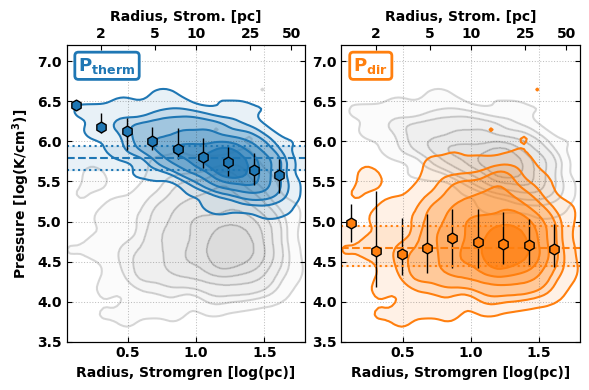

In [69]:
data_x1 = radius_strom_pc
data_y1 = Ptherm
data_x2 = radius_strom_pc
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.05, 1.8)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Radius, Stromgren [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius, Strom. [pc]')
    ax3.grid(False)

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_strom_contour.pdf', dpi=200, bbox_inches='tight')

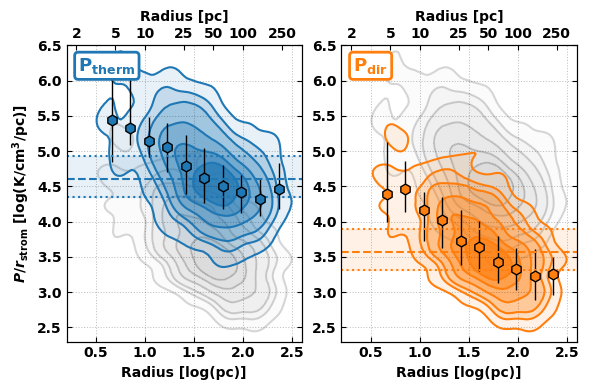

In [70]:
data_x1 = radius_circ_pc
data_y1 = Ptherm-radius_strom_pc
data_x2 = radius_circ_pc
data_y2 = Pdir_circ-radius_strom_pc

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(2.3, 6.5)

    ax.set_xlabel('Radius [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius [pc]')
    ax3.grid(False)
    
ax1.set_ylabel('$P/r_\mathrm{strom}$ [log(K/cm$^3$/pc)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2), zorder=10)
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2), zorder=10)

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_stromnorm_contour.pdf', dpi=200, bbox_inches='tight')

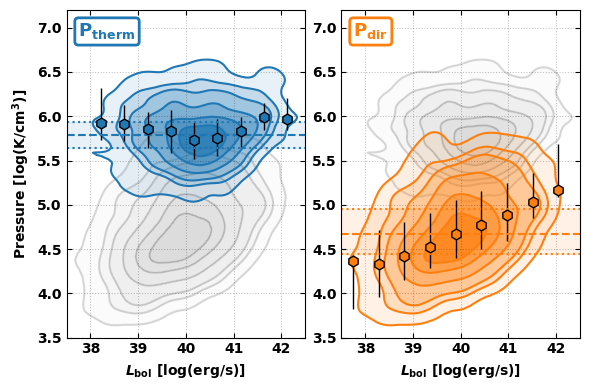

In [71]:
data_x1 = np.log10(lbol)
data_y1 = Ptherm
data_x2 = np.log10(lbol)
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(37.5, 42.5)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('$L_\mathrm{bol}$ [log(erg/s)]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2), zorder=10)
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2), zorder=10)

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_plum_contour.pdf', dpi=200, bbox_inches='tight')

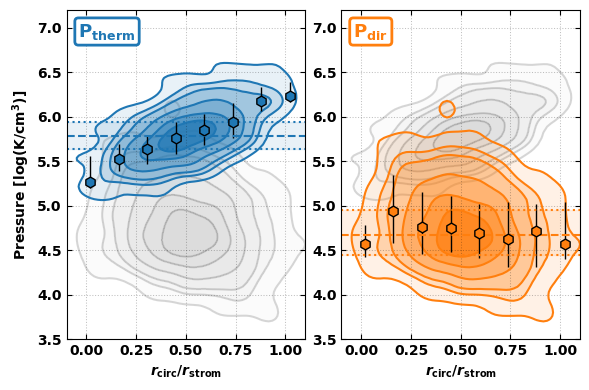

In [72]:
data_x1 = radius_circ_pc-radius_strom_pc
data_y1 = Ptherm
data_x2 = radius_circ_pc-radius_strom_pc
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('$r_\mathrm{circ}/r_\mathrm{strom}$')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2), zorder=10)
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2), zorder=10)

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_rstromnorm_contour.pdf', dpi=200, bbox_inches='tight')

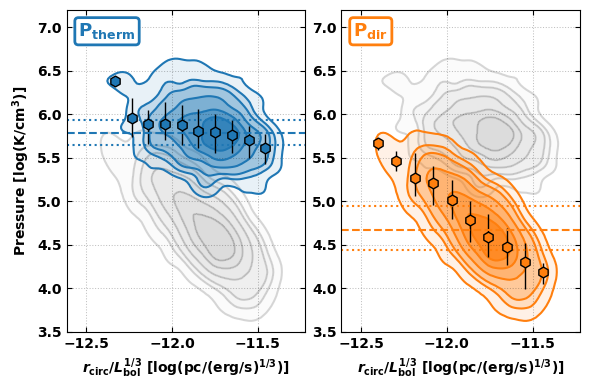

In [73]:
data_x1 = radius_circ_pc-np.log10(lbol**(1/3))
data_y1 = Ptherm
data_x2 = radius_circ_pc-np.log10(lbol**(1/3))
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    # ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)
    ax.set_xlabel('$r_\mathrm{circ}/L_\mathrm{bol}^{1/3}$ [log(pc/(erg/s)$^{1/3}$)]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2), zorder=10)
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2), zorder=10)

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prad_rLnorm_contour.pdf', dpi=200, bbox_inches='tight')

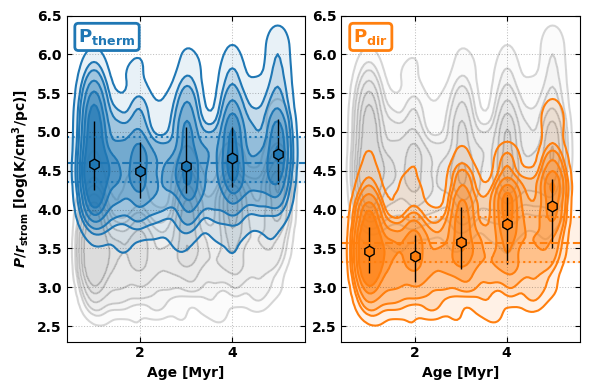

In [74]:
data_x1 = age
data_y1 = Ptherm-radius_strom_pc
data_x2 = age
data_y2 = Pdir_circ-radius_strom_pc

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0.5, 5.5, 6))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    # ax.set_xlim(0.2, 2.6)
    ax.set_ylim(2.3, 6.5)

    ax.set_xlabel('Age [Myr]')
    
ax1.set_ylabel('$P/r_\mathrm{strom}$ [log(K/cm$^3$/pc)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2), zorder=10)
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2), zorder=10)

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_page_stromnorm_contour.pdf', dpi=200, bbox_inches='tight')

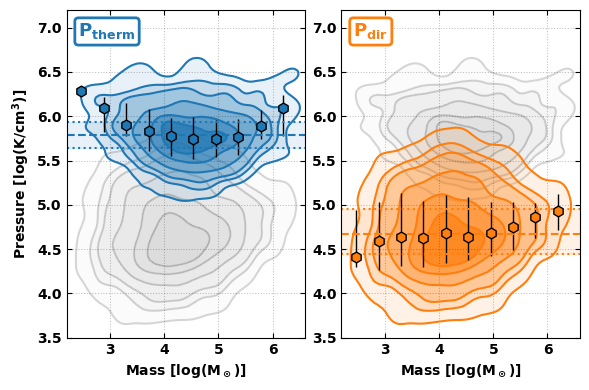

In [75]:
data_x1 = mass
data_y1 = Ptherm
data_x2 = mass
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(2.2, 6.6)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Mass [log(M$_\odot$)]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_pmass_contour.pdf', dpi=200, bbox_inches='tight')

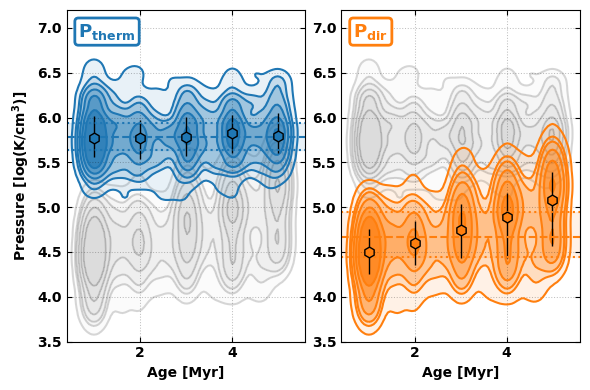

In [76]:
data_x1 = age
data_y1 = Ptherm
data_x2 = age
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0.5, 5.5, 6))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    # ax.set_xlim(0, 7)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Age [Myr]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_page_contour.pdf', dpi=200, bbox_inches='tight')

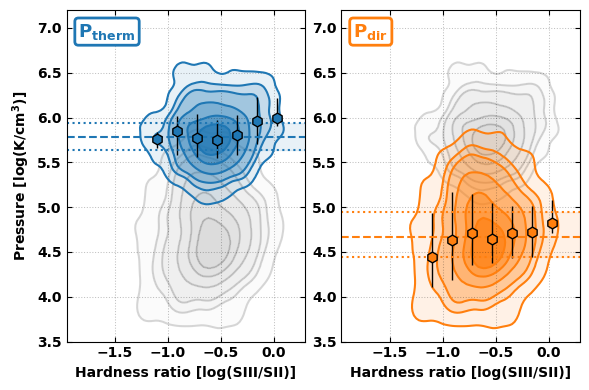

In [77]:
data_x1 = ratio_siii_sii[s_mask]
data_y1 = Ptherm[s_mask]
data_x2 = ratio_siii_sii[s_mask]
data_y2 = Pdir_circ[s_mask]

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(-1.2, 0.5, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    # ax.set_xlim(0, 7)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Hardness ratio [log(SIII/SII)]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_phard_contour.pdf', dpi=200, bbox_inches='tight')

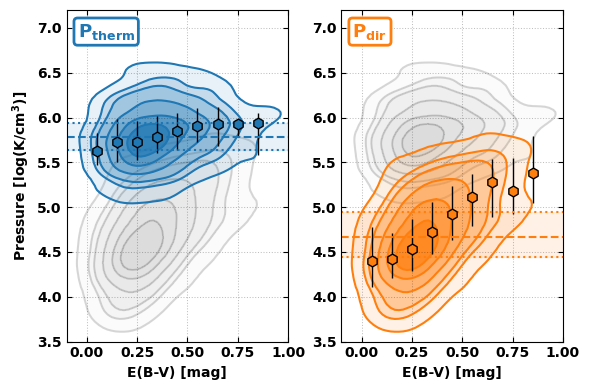

In [78]:
data_x1 = ebv
data_y1 = Ptherm
data_x2 = ebv
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0, 0.9, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(-0.1, 1)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('E(B-V) [mag]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_pebv_contour.pdf', dpi=200, bbox_inches='tight')

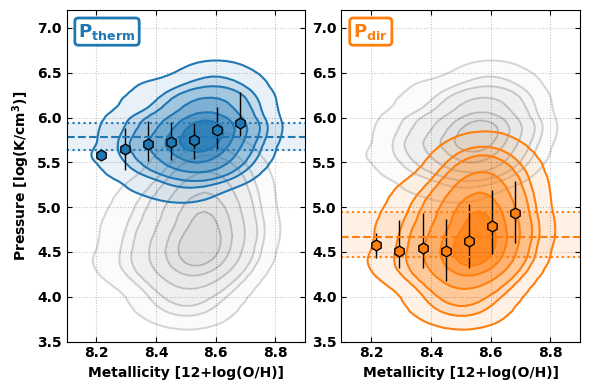

In [79]:
data_x1 = met
data_y1 = Ptherm
data_x2 = met
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(8.1, 8.8, 10))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(8.1, 8.9)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Metallicity [12+log(O/H)]')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_pmet_contour.pdf', dpi=200, bbox_inches='tight')

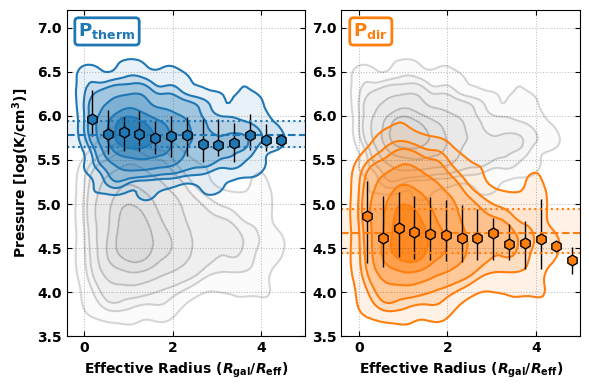

In [80]:
data_x1 = raduis_eff
data_y1 = Ptherm
data_x2 = raduis_eff
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='C%i' %i, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

    x, y, stats, bins = get_bins_1d(data_x, data_y, bins=np.linspace(0, 5, 15))
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
    ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(-0.4, 5)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Effective Radius ($R_\mathrm{gal}/R_\mathrm{eff}$)')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prgal_contour.pdf', dpi=200, bbox_inches='tight')

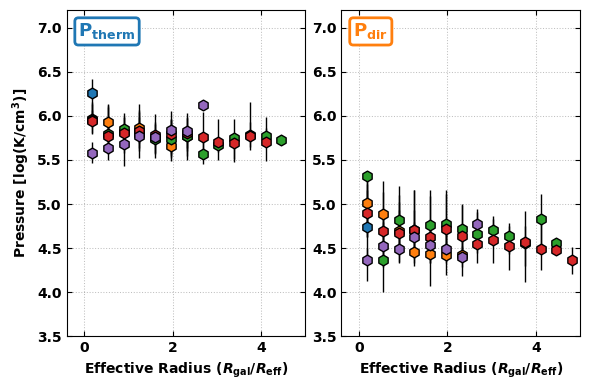

In [81]:
data_x1 = raduis_eff
data_y1 = Ptherm
data_x2 = raduis_eff
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):


    environments = [[1], [2,3], [5,6], [4,7,8], [9]]
    environments_names = ['Centre', 'Bar', 'Arm', 'Interarm', 'Disc']

    for j, environment in enumerate(environments):

        mask_env = sum(([table['Environment_MUSE'] == env for env in environment])) == 1
        data_x_, data_y_ = data_x[mask_env], data_y[mask_env]

        # ax = density_contour(data_x_, data_y_, xscale='linear', yscale='linear', ax=ax, color='C%i' %j, contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6))
        # ax = density_contour(data_x_, data_y_, xscale='linear', yscale='linear', ax=ax, color='C%i' %j, contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6))

        x, y, stats, bins = get_bins_1d(data_x_, data_y_, bins=np.linspace(0, 5, 15))
        ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
        ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%j)

# for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

#     ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contour', smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.ones(6)*0.3, zorder=0)
#     ax = density_contour(data_x, data_y, xscale='linear', yscale='linear', ax=ax, color='grey', contour_type='contourf',  smoothbins=(3, 3), levels=(0.25, 0.5, 0.75, 0.9, 0.95, 0.99), alphas=np.linspace(0.9, 0.1, 6)*0.3, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(-0.4, 5)
    ax.set_ylim(3.5, 7.2)

    ax.set_xlabel('Effective Radius ($R_\mathrm{gal}/R_\mathrm{eff}$)')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')


ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)
plt.savefig('./figs/scatter_prgal_env_contour.pdf', dpi=200, bbox_inches='tight')